In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [205]:
train = pd.read_csv('/kaggle/input/taobao-sales-prediction/my_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
test = pd.read_csv('/kaggle/input/taobao-sales-prediction/my_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [207]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [208]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [209]:
def preprocessing(df):
    df = df.copy()
    df = df.drop(['PassengerId','Name', 'Cabin','Ticket'], axis = 1)
    dummies = pd.get_dummies(df['Embarked'], prefix = 'Embarked')
    df['Sex'] = df['Sex'].replace({'male' : 0, 'female' : 1})
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop('Embarked', axis = 1)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    return df

In [210]:
train_df = preprocessing(train)
test_df = preprocessing(test)

# Splitting Data

In [211]:
X = train_df.drop('Survived', axis = 1)
Y = train_df['Survived']

# Standardize the Data

In [212]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [213]:
from scipy.stats import zscore
X = X.apply(zscore)
test_df = test_df.apply(zscore)

# Train Test Split

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, shuffle = True, random_state = 1)

In [216]:
class_weight = {0 : 1,
               1 : 1.5}

# SVM Model

In [217]:
from sklearn.svm import SVC

In [218]:
model = SVC(class_weight = class_weight)
model.fit(x_train, y_train)

SVC(class_weight={0: 1, 1: 1.5})

# Results

In [219]:
print('Train Score : {:.3f}%'.format(model.score(x_train, y_train)*100))
print('Test Score : {:.3f}%'.format(model.score(x_test, y_test)*100))

Train Score : 84.731%
Test Score : 80.269%


In [220]:
y_pred = model.predict(x_test)

In [221]:
from sklearn.metrics import confusion_matrix, classification_report

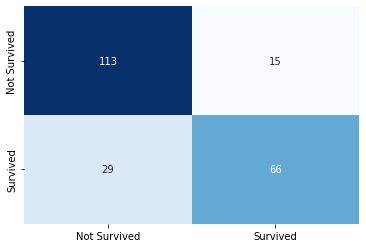

Classification Report : 
              precision    recall  f1-score   support

Not Survived       0.80      0.88      0.84       128
    Survived       0.81      0.69      0.75        95

    accuracy                           0.80       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [222]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['Not Survived', 'Survived'])
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'Blues')
plt.xticks(ticks = (0.5, 1.5), labels = ['Not Survived', 'Survived'])
plt.yticks(ticks = (0.5, 1.5),labels = ['Not Survived', 'Survived'])
plt.show()
print(f'Classification Report : \n{clr}')

# New Model with Balanced Data

In [223]:
from imblearn.over_sampling import SMOTE

In [224]:
new_df  = preprocessing(train)

In [225]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,28.0,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [226]:
new_X = new_df.drop('Survived', axis = 1)
new_Y = new_df['Survived']

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y,test_size=0.3, 
                                                    random_state=1, 
                                                    shuffle=True, 
                                                    stratify=new_Y )

In [228]:
oversampled = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, Y_train)

In [229]:
y_train_smote.value_counts()

1    384
0    384
Name: Survived, dtype: int64

In [230]:
class_weight2 = {0 : 1,
               1 : 1.5}

In [231]:
model2 = SVC(kernel = 'linear', class_weight = class_weight2)
model2.fit(X_train, Y_train)

SVC(class_weight={0: 1, 1: 1.5}, kernel='linear')

In [232]:
print('Train Score : {:.3f}%'.format(model2.score(X_train, Y_train)*100))
print('Test Score : {:.3f}%'.format(model2.score(X_test, Y_test)*100))

Train Score : 78.973%
Test Score : 79.851%


In [233]:
Y_pred = model2.predict(X_test)

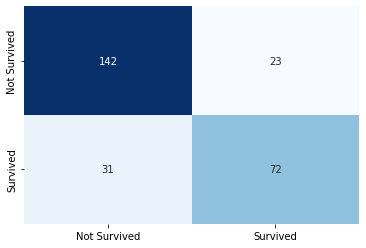

Classification Report : 
              precision    recall  f1-score   support

Not Survived       0.82      0.86      0.84       165
    Survived       0.76      0.70      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [234]:
cm = confusion_matrix(Y_test, Y_pred)
clr = classification_report(Y_test, Y_pred, target_names = ['Not Survived', 'Survived'])
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'Blues')
plt.xticks(ticks = (0.5, 1.5), labels = ['Not Survived', 'Survived'])
plt.yticks(ticks = (0.5, 1.5),labels = ['Not Survived', 'Survived'])
plt.show()
print(f'Classification Report : \n{clr}')

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(max_depth = 1)
model3.fit(X_train, Y_train)
print('Train Score : {:.3f}%'.format(model3.score(X_train, Y_train)*100))
print('Test Score : {:.3f}%'.format(model3.score(X_test, Y_test)*100))

Train Score : 82.504%
Test Score : 80.597%


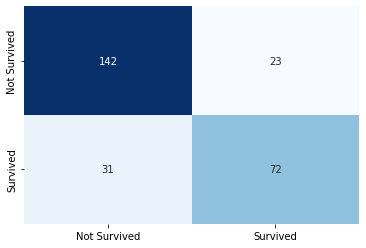

Classification Report : 
              precision    recall  f1-score   support

Not Survived       0.82      0.86      0.84       165
    Survived       0.76      0.70      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [236]:
Y_pred2 = model2.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred2)
clr = classification_report(Y_test, Y_pred2, target_names = ['Not Survived', 'Survived'])
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'Blues')
plt.xticks(ticks = (0.5, 1.5), labels = ['Not Survived', 'Survived'])
plt.yticks(ticks = (0.5, 1.5),labels = ['Not Survived', 'Survived'])
plt.show()
print(f'Classification Report : \n{clr}')

# Gradient Boosting Final Predictions

In [243]:
final_pred1 = model3.predict(test_df)

In [244]:
final_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# SVM without Oversampling Final Predictions

In [246]:
final_pred2 = model.predict(test_df)
final_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

 # SVM with Oversmapling Final Predictions

In [247]:
final_pred3 = model2.predict(test_df)
final_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [251]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [255]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = final_pred1
submission.to_csv('submission.csv', index = False)